In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

In [2]:
from paralleltomo import paralleltomo

# Exploration - test image

In [3]:
test_image = np.load("./testImage.npy")
test_image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Analyser billedet

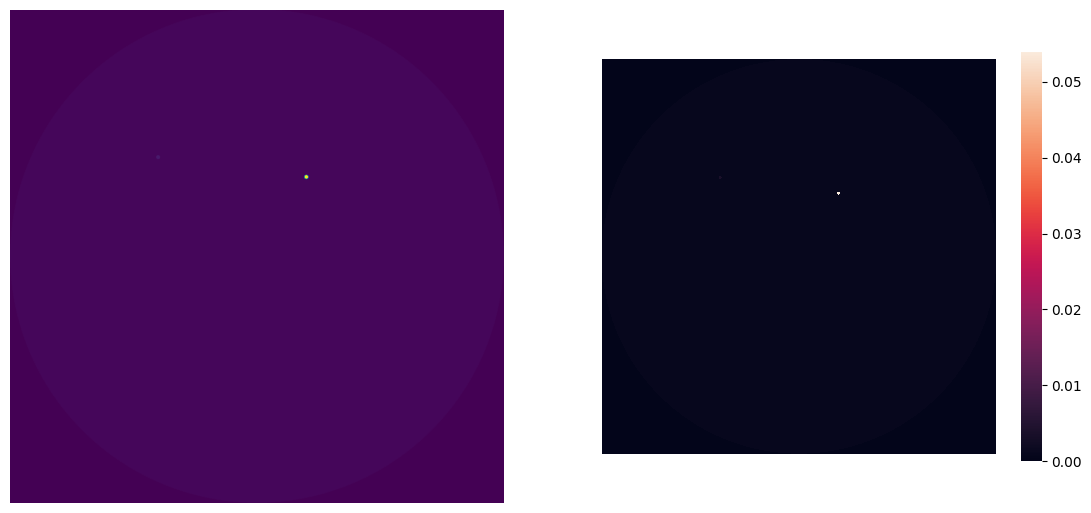

In [32]:
# Tager et par sekunder at kører
plt.figure(figsize=(14,14))
plt.subplot(1,2,1)
plt.imshow(test_image)
plt.axis("off")

plt.subplot(1,2,2)
sns.heatmap(test_image, square=True, cbar_kws={"shrink": .38})
plt.axis("off")

plt.show()

Ovenstående ser ret homogent ud, lad os teste det

In [27]:
unique_values = np.unique(test_image)
unique_values

array([0.        , 0.00084964, 0.0037101 , 0.05397852])

In [28]:
test_image_list = list([val for row in test_image for val in row])
for unique_val in unique_values:
    count = test_image_list.count(unique_val)
    print(f"Value: {unique_val:.6f} \n\t--- Count: {count} \n\t--- Coverage: {count/len(test_image_list)*100:.3f}%")

Value: 0.000000 
	--- Count: 5365197 
	--- Coverage: 21.461%
Value: 0.000850 
	--- Count: 19632289 
	--- Coverage: 78.529%
Value: 0.003710 
	--- Count: 1257 
	--- Coverage: 0.005%
Value: 0.053979 
	--- Count: 1257 
	--- Coverage: 0.005%


Ovenstående tests leder til følgende observationer ved sammenligning med billederne plottet ovenfor:

- Værdien `0` svarer til *luft*
- Værdien `8.5e-3` svarer til *Træ*
- Værdien `3.71e-3` svarer til *Bly*
- Værdien `0.054` svarer til *Stål*

For bedre at kunne skelne mellem luft, træ, bly og stål på billedet introduceres derfor farvekanaler

In [38]:
np.expand_dims(test_image, 2).shape

(5000, 5000, 1)

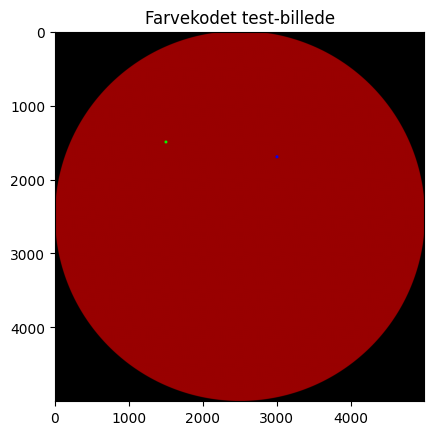

In [49]:
color_test_image = np.repeat(np.expand_dims(test_image, 2), 3, axis=2)
color_test_image[:,:,0] = (test_image == unique_values[1]) * 3/5
color_test_image[:,:,1] = (test_image == unique_values[2])
color_test_image[:,:,2] = (test_image == unique_values[3])
# Det tager lidt tid at plotte
plt.imshow(color_test_image)
plt.title("Farvekodet test-billede")
plt.show()

# Exploration - conds

In [ ]:
cvxpy_ims = [name for name in os.listdir("./images-cvxpy")]
cvxpy_ims = sorted(cvxpy_ims, key = lambda t: float(t.split("cond=")[1].split(",")[0]))
len(cvxpy_ims)

plt.figure(figsize=(18,18))
for i in range(9):
    im_name = cvxpy_ims[i*5]
    plt.subplot(3,3,i+1)
    img = PIL.Image.open(f"./images-cvxpy/{im_name}")
    plt.imshow(img)
    cond = float(im_name.split("cond=")[1].split(",")[0])
    N = im_name.split(",")[0].split("N=")[1]
    plt.title(f"Cond={cond:.4}, N={N}")
plt.show()

# Exploration - simulations
https://github.com/fgbossema/line_trajectory_simulations